# Regression

#### Modèle linéaire

In [88]:
install.packages("h2o")

Installing package into 'C:/Users/rida-/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'RCurl'




package 'RCurl' successfully unpacked and MD5 sums checked
package 'h2o' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rida-\AppData\Local\Temp\Rtmp8ENAEj\downloaded_packages


In [3]:
to_class<-function(x){
    if (x<30){
        return("A")
    } else if(x<35){
        return("B")
    } else if(x<45){
        return("C")
    } else if(x<55){
        return("D")
    } else if(x<65){
        return("E")
    } else if(x<75){
        return("F")
    }else{
        return("G")
    }
}

to_class_list<-function(l){
    result = l
    lapply(result, to_class)
}

In [5]:
# Lecture des données
library(readr)
data <- read_csv("Data/DataEnergy.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Relative.compactness = col_double(),
  Surface.area = col_double(),
  Wall.area = col_double(),
  Roof.area = col_double(),
  Overall.height = col_double(),
  orientation = col_character(),
  Glazing.area = col_double(),
  Glazing.area.distr = col_double(),
  Energy = col_double(),
  Energy.efficiency = col_character()
)




In [6]:
head(data) # resumé des données
data$orientation=as.factor(data$orientation) # On transforme les variables qualitatives en facteur
data$Glazing.area.distr=as.factor(data$Glazing.area.distr)
data$Energy.efficiency=as.factor(data$Energy.efficiency)

Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.8909102            558.6037     314.9162  121.8437  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 East        -9.386813e-03 0                  34.58975 B                
3 South       -6.974937e-04 0                  38.77805 C                
4 West         9.554434e-06 0                  37.94781 C                
5 North       -6.592326e-03 0                  47.67586 D                
6 East        -1.612145e-02 0                  41.90847 C

In [7]:
#install.packages("Deducer")
# install.packages("caret")
# install.packages("ROCR")
# install.packages("MASS")
# install.packages("pROC")
# install.packages("rpart")

In [8]:
# Importation des libraries necessaires pour l'exeution des codes
# library (Deducer)
library(caret)
library(ROCR)
library(MASS)
# library(pROC)
library(rpart)
library(rpart.plot)

Loading required package: lattice

Loading required package: ggplot2



ERROR: Error in library(rpart.plot): there is no package called 'rpart.plot'


## Processus de Division du jeux de données: Apprentissage-Test

In [11]:
#dimension des données
dim(data)
#fréquences relatives des classes
print(prop.table(table(data$Energy.efficiency)))
#set.seed pour rendre reproductible les résultats 
set.seed(100) 
print(set.seed(100))

#On Partitionne les données en données d'apprentissage et de test. 
y=data$Energy.efficiency
print(length(y))
library(caret)
library(e1071)
partition <- createDataPartition(y, times = 1, p = 0.7, list =F) 




[1] 768  10


        A         B         C         D         E         F         G 
0.2708333 0.1419271 0.1041667 0.1028646 0.1419271 0.1328125 0.1054688 
NULL
[1] 768


## Subdivision apprentissage-test

In [12]:

#data frame pour les individus en apprentissage
DataTrain <- data[partition,] 
print(dim(DataTrain))
head(DataTrain)

#data frame pour les individus en test
DataTest <- data[-partition,] 
print(dim(DataTest))
head(DataTest)

#fréquences absolues des classes - éch. d'apprentissage
print(table(DataTrain$Energy.efficiency))

#fréquences relatives des classes dans l'éch. d'apprentissage 
print(prop.table(table(DataTrain$Energy.efficiency)))

#fréquences absolues des classes - éch. Test
print(table(DataTest$Energy.efficiency))

#fréquences relatives des classes - éch. Test
print(prop.table(table(DataTest$Energy.efficiency)))

Warning message:
"The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


[1] 541  10


Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.9031505            559.7491     320.9447  119.4022  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 East        -9.386813e-03 0                  34.58975 B                
3 South       -6.974937e-04 0                  38.77805 C                
4 West         9.554434e-06 0                  37.94781 C                
5 North       -6.592326e-03 0                  47.67586 D                
6 South       -2.477763e-03 0                  40.34359 C

[1] 227  10


Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.8909102            558.6037     314.9162  121.8437  7             
2 0.8554034            596.2685     298.7158  148.7764  7             
3 0.8226011            608.9104     313.4738  147.7183  7             
4 0.8240845            617.1164     320.8470  148.1347  7             
5 0.7883421            636.2563     348.0241  144.1161  7             
6 0.7956036            630.7854     341.1309  144.8273  7             
  orientation Glazing.area Glazing.area.distr Energy   Energy.efficiency
1 East        -0.016121452 0                  41.90847 C                
2 East        -0.009540551 0                  46.98544 D                
3 East        -0.007442304 0                  41.56658 C                
4 West         0.008506713 0                  34.65949 B                
5 East         0.001517881 0                  62.08273 E                
6 South       -0.002210213 0                  63.47804 E


  A   B   C   D   E   F   G 
146  77  56  56  77  72  57 

        A         B         C         D         E         F         G 
0.2698706 0.1423290 0.1035120 0.1035120 0.1423290 0.1330869 0.1053604 

 A  B  C  D  E  F  G 
62 32 24 23 32 30 24 

        A         B         C         D         E         F         G 
0.2731278 0.1409692 0.1057269 0.1013216 0.1409692 0.1321586 0.1057269 


## Random Forest

In [297]:
library(randomForest)
rf.reg=randomForest(Energy ~ Relative.compactness+Surface.area+Wall.area+Roof.area+
                   Overall.height+orientation+Glazing.area+  Glazing.area.distr, data = DataTrain,
   ntree=300,do.trace=50,importance=TRUE)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
  50 |    25.46     6.45 |
 100 |    24.13     6.11 |
 150 |    24.14     6.12 |
 200 |    24.27     6.15 |
 250 |    24.09     6.10 |
 300 |    23.99     6.08 |


In [298]:
print(rf.reg) 


Call:
 randomForest(formula = Energy ~ Relative.compactness + Surface.area +      Wall.area + Roof.area + Overall.height + orientation + Glazing.area +      Glazing.area.distr, data = DataTrain, ntree = 300, do.trace = 50,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 300
No. of variables tried at each split: 2

          Mean of squared residuals: 23.99389
                    % Var explained: 93.92


Evolution de la loss selon le nombre d'arbre

png 
  2

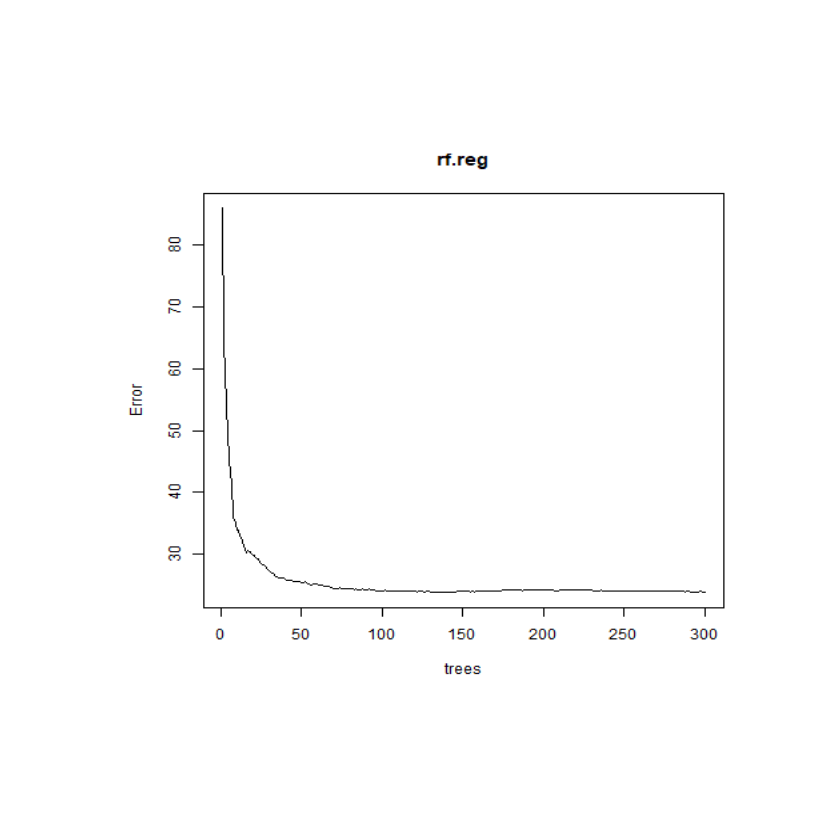

In [299]:
png(file = "randomForestRegression.png")   
# Plot the error vs the number of trees graph 
plot(rf.reg)  
# Saving the file 
dev.off() 
library("png")
pp <- readPNG("randomForestRegression.png")
plot.new() 
rasterImage(pp,0,0,1,1)

In [300]:
#Prediction et performance du Random Forest
pred_rf <- predict(rf.reg,newdata=DataTest)
res <- to_class_list(pred_rf)

In [301]:
conf_rf <- table(data = as.data.frame(res), reference = DataTest$Energy.efficiency)
conf_rf

    reference
data  A  B  C  D  E  F  G
   A 50 13  2  0  0  0  0
   B 12 16  9  0  0  0  0
   C  0  3 11  1  0  0  0
   D  0  0  2 13  4  0  0
   E  0  0  0  9 20  9  0
   F  0  0  0  0  8 16  9
   G  0  0  0  0  0  5 15

In [302]:
# F1_score
library('MLmetrics')

F1_Score(y_pred = as.data.frame(res), y_true = DataTest$Energy.efficiency)

[1] 0.7874016

Le modèle rencontre des difficultés a prédire la classe B, nous allons maintenant essayer de l'optimiser en mettant a jour les paramètres.

### Optimisation du random forest

In [147]:
# Define the control of the cross validation
trControl <- trainControl(method = "cv",
    number = 3,
    search = "grid")

Nous allons d'abord essayer de trouvé le meilleur mtry : nombre de variables testées à chaque split.

In [148]:
# search best_mtry
set.seed(1234)
tuneGrid <- expand.grid(.mtry = c(1: 8))
rf_mtry <- train(Energy ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr,
    data = DataTrain,
    method = "rf",
    metric = "RMSE",
    tuneGrid = tuneGrid,
    trControl = trControl,
    importance = TRUE,
    nodesize = 14,
    ntree = 500)
print(rf_mtry)

Random Forest 

541 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 361, 360, 361 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  1     9.058928  0.8701056  7.222629
  2     6.209716  0.9089385  4.851355
  3     5.616031  0.9226218  4.322590
  4     5.414104  0.9276291  4.165233
  5     5.290335  0.9306751  4.055614
  6     5.239370  0.9318180  4.038143
  7     5.223217  0.9322328  4.023987
  8     5.176547  0.9332298  4.003924

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 8.


In [149]:
best_mtry = rf_mtry$bestTune$mtry
best_mtry

[1] 8

On cherche maintenant le meilleur max_node -> nombre de feuilles maximales dans chaque arbre de la forêt aléatoire.

In [280]:
store_maxnode <- list()
tuneGrid <- expand.grid(.mtry = best_mtry)
for (maxnodes in c(8: 30)) {
    set.seed(1234)
    rf_maxnode <- train(Energy ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr,
        data = DataTrain,
        method = "rf",
        metric = "RMSE",
        tuneGrid = tuneGrid,
        trControl = trControl,
        importance = TRUE,
        nodesize = 14,
        maxnodes = maxnodes,
        ntree = 500)
    current_iteration <- toString(maxnodes)
    store_maxnode[[current_iteration]] <- rf_maxnode
}
results_mtry <- resamples(store_maxnode)
summary(results_mtry)


Call:
summary.resamples(object = results_mtry)

Models: 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30 
Number of resamples: 3 

MAE 
       Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
8  4.464923 4.502005 4.539086 4.700574 4.818400 5.097713    0
9  4.364439 4.405880 4.447321 4.613712 4.738349 5.029378    0
10 4.243401 4.303245 4.363089 4.514981 4.650771 4.938453    0
11 4.193765 4.271840 4.349915 4.491838 4.640875 4.931835    0
12 4.084713 4.195766 4.306820 4.423178 4.592411 4.878002    0
13 4.045543 4.149185 4.252826 4.373236 4.537083 4.821340    0
14 3.936267 4.079982 4.223696 4.305224 4.489702 4.755708    0
15 3.907669 4.066712 4.225756 4.300178 4.496433 4.767109    0
16 3.869940 4.024567 4.179194 4.261184 4.456807 4.734419    0
17 3.799519 3.969597 4.139674 4.206192 4.409529 4.679384    0
18 3.799702 3.968617 4.137533 4.209458 4.414336 4.691139    0
19 3.828992 3.959344 4.089696 4.189013 4.369023 4.648350    0
20 3.755496 3.920

Pour le max_nodes on prend la valeur 28 minimum de la moyenne de RMSE

In [281]:
best_maxnodes = 28

Nous allons maintenant optimiser l'hyperparamètre maxtree qui est le nombre d'arbre dans la forêt aléatoire.

In [282]:
store_maxtrees <- list()
for (ntree in c(50, 100, 200, 250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000)) {
    set.seed(5678)
    rf_maxtrees <- train(Energy ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr,
        data = DataTrain,
        method = "rf",
        metric = "RMSE",
        tuneGrid = tuneGrid,
        trControl = trControl,
        importance = TRUE,
        nodesize = 14,
        maxnodes = 28,
        ntree = ntree)
    key <- toString(ntree)
    store_maxtrees[[key]] <- rf_maxtrees
}
results_tree <- resamples(store_maxtrees)
summary(results_tree)


Call:
summary.resamples(object = results_tree)

Models: 50, 100, 200, 250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000 
Number of resamples: 3 

MAE 
         Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
50   4.045107 4.100828 4.156548 4.139998 4.187443 4.218339    0
100  3.984799 4.043084 4.101369 4.110159 4.172839 4.244309    0
200  3.958356 4.024221 4.090086 4.111025 4.187360 4.284634    0
250  4.000118 4.048214 4.096310 4.128491 4.192678 4.289045    0
300  4.012804 4.047018 4.081232 4.130031 4.188644 4.296055    0
350  4.002939 4.044276 4.085614 4.132343 4.197046 4.308478    0
400  4.012529 4.046437 4.080345 4.133519 4.194015 4.307685    0
450  4.012258 4.043117 4.073975 4.129431 4.188017 4.302059    0
500  4.012703 4.044462 4.076221 4.130938 4.190055 4.303889    0
550  4.000927 4.037718 4.074508 4.132385 4.198114 4.321720    0
600  3.999749 4.036489 4.073229 4.129791 4.194812 4.316395    0
800  4.003407 4.038490 4.073573 4.139059 4.206885 4.340197    0
1000 4.010

on va prendre 200 arbre

In [287]:
fit_rf <- train(Energy~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr,
    DataTrain,
    method = "rf",
    metric = "RMSE",
    tuneGrid = tuneGrid,
    trControl = trControl,
    importance = TRUE,
    ntree = 200,
    maxnodes = best_maxnodes)

In [288]:
predictions_rf <-to_class_list(predict(fit_rf, DataTest))

In [289]:
conf_rf <- table(data = as.data.frame(predictions_rf), reference = DataTest$Energy.efficiency)
conf_rf

    reference
data  A  B  C  D  E  F  G
   A 48 11  0  0  0  0  0
   B 14 17 13  0  0  0  0
   C  0  3  8  0  0  0  0
   D  0  1  3 13  5  0  0
   E  0  0  0  9 20  8  0
   F  0  0  0  1  7 17 11
   G  0  0  0  0  0  5 13

In [290]:
F1_Score(y_pred = as.data.frame(predictions_rf), y_true = DataTest$Energy.efficiency)

[1] 0.7933884

En mettant a jour nos parametre, on constate une legere hausse du score de notre modele.

## Gradient Boosting

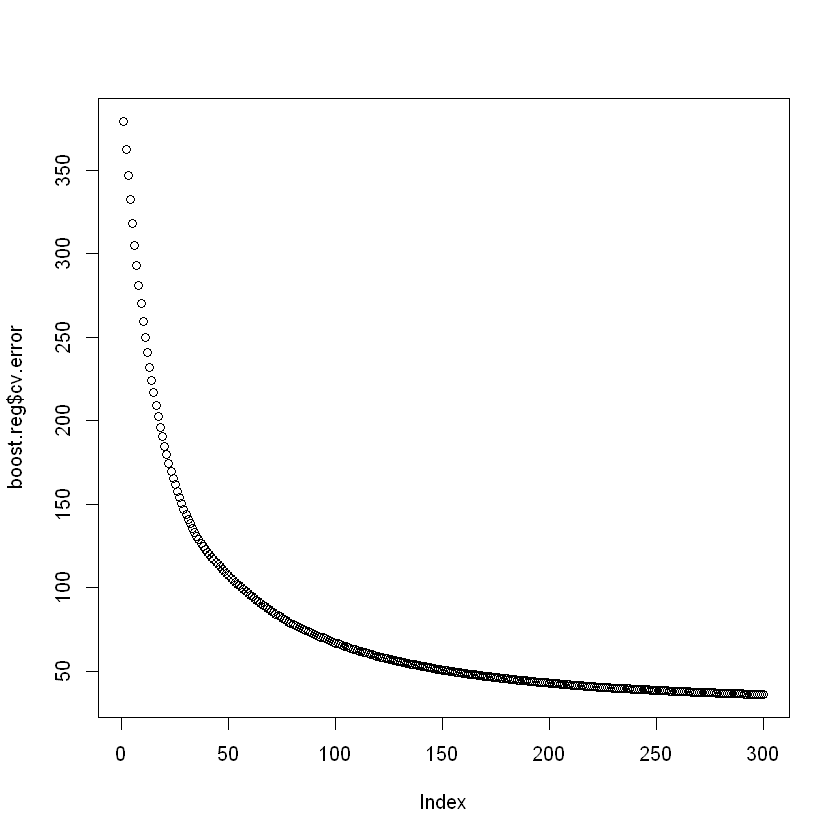

In [51]:
library(gbm)

boost.reg=gbm(Energy ~ Relative.compactness+Surface.area+Wall.area+Roof.area+
              Overall.height+orientation+Glazing.area+  Glazing.area.distr, data = DataTrain,,distribution="gaussian"
              ,n.trees=300, cv.folds=10,n.minobsinnode = 5,shrinkage=0.03,verbose=FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error)

In [52]:
#Prediction et performance du Random Forest
pred_gb <- predict(boost.reg,newdata=DataTest)
res_gb <- to_class_list(pred_gb)

Using 300 trees...




In [53]:
conf_rf <- table(data = as.data.frame(res_gb), reference = DataTest$Energy.efficiency)
conf_rf

    reference
data  A  B  C  D  E  F  G
   A 46 10  1  0  0  0  0
   B 15 15 10  0  0  0  0
   C  1  6 10  0  0  0  0
   D  0  1  3  4  2  0  0
   E  0  0  0 18 24  8  0
   F  0  0  0  1  6 20 16
   G  0  0  0  0  0  2  8

In [54]:
# F1_score
library('MLmetrics')
F1_Score(y_pred = as.data.frame(res_gb), y_true = DataTest$Energy.efficiency)

[1] 0.7731092

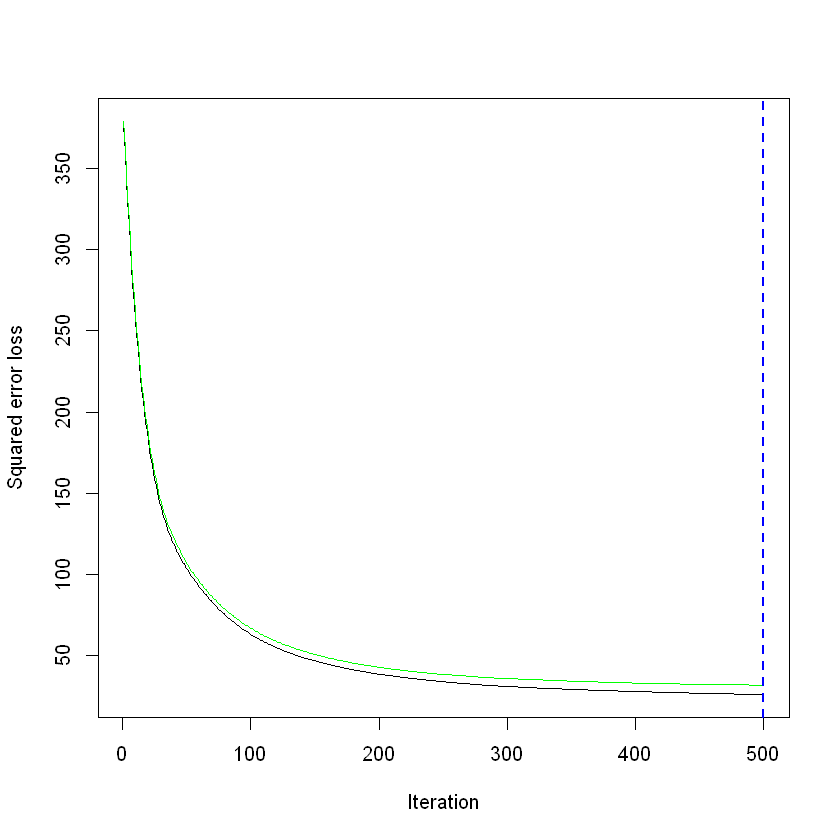

In [18]:
best.iter=gbm.perf(boost.reg,method="cv")

On remarque que le modele a du mal a predire la classe B

## Optimisation Gradient boosting

Nous allons essayer d'optimiser notre modele en essayant differente valeur pour le nombre d'arbe et coefficient de shrinkage de maniere a minimiser l'erreur

In [96]:
install.packages("adabag")

Installing package into 'C:/Users/rida-/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'doParallel'




package 'doParallel' successfully unpacked and MD5 sums checked
package 'adabag' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rida-\AppData\Local\Temp\Rtmp8ENAEj\downloaded_packages


In [89]:
library(dplyr)
library(h2o)

# create grid search
hyper_grid <- expand.grid(
  learning_rate = c(0.3, 0.1, 0.05, 0.01, 0.005),
  RMSE = NA,
  trees = NA,
  time = NA
)

# execute grid search
for(i in seq_len(nrow(hyper_grid))) {

  # fit gbm
  set.seed(123)  # for reproducibility
  train_time <- system.time({
    m <- gbm(
      formula = Energy ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                  Overall.height+orientation+Glazing.area+Glazing.area.distr,
      data = DataTrain,
      distribution = "gaussian",
      n.trees = 5000, 
      shrinkage = hyper_grid$learning_rate[i], 
      interaction.depth = 3, 
      n.minobsinnode = 10,
      cv.folds = 10 
   )
  })
  
  # add SSE, trees, and training time to results
  hyper_grid$RMSE[i]  <- sqrt(min(m$cv.error))
  hyper_grid$trees[i] <- which.min(m$cv.error)
  hyper_grid$Time[i]  <- train_time[["elapsed"]]

}

# results
arrange(hyper_grid, RMSE)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: 'h2o'


The following objects are masked from 'package:stats':

    cor, sd, var


The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




learning_rate RMSE     trees time Time
1 0.010         4.856483 1751  NA   6.95
2 0.005         4.875741 2184  NA   6.33
3 0.100         4.894725  157  NA   6.30
4 0.050         4.912379  296  NA   6.46
5 0.300         4.968406   40  NA   6.17

On met ajour nos parametres.

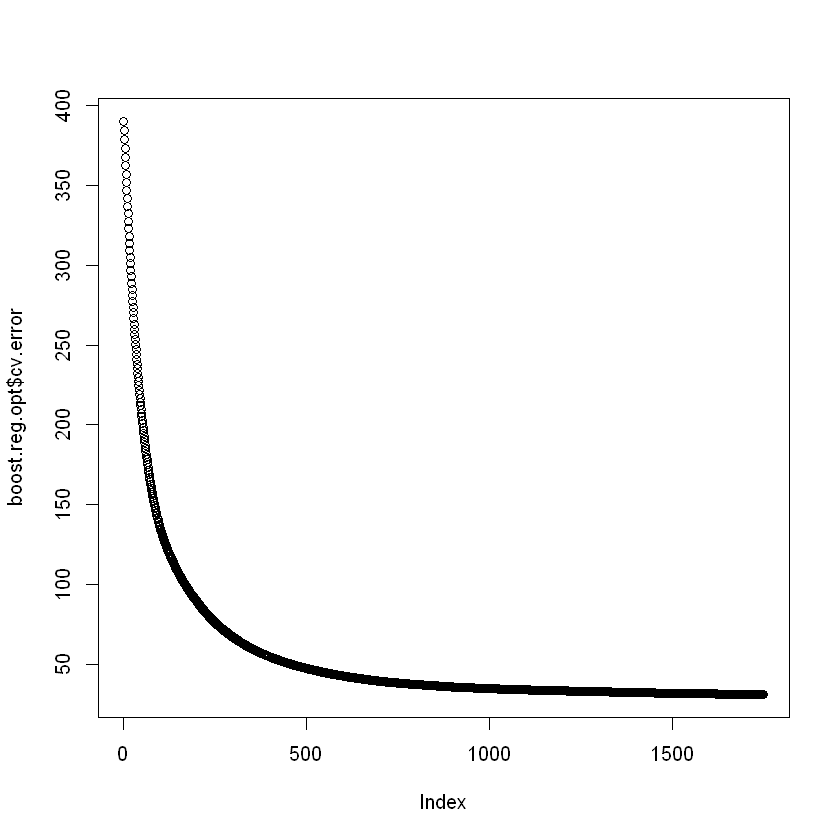

In [91]:
boost.reg.opt=gbm(Energy ~ Relative.compactness+Surface.area+Wall.area+Roof.area+
              Overall.height+orientation+Glazing.area+  Glazing.area.distr, data = DataTrain,,distribution="gaussian"
              ,n.trees=1751, cv.folds=10,n.minobsinnode = 5,shrinkage=0.01,,verbose=FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg.opt$cv.error)

In [92]:
res_gbopt <- to_class_list(predict(boost.reg.opt,newdata=DataTest))

Using 1751 trees...




In [93]:
conf_gbopt <- table(data = as.data.frame(res_gbopt), reference = DataTest$Energy.efficiency)
conf_gbopt

    reference
data  A  B  C  D  E  F  G
   A 49 12  1  0  0  0  0
   B 12 13 10  0  0  0  0
   C  1  6 10  1  0  0  0
   D  0  1  3  7  4  0  0
   E  0  0  0 14 26  9  0
   F  0  0  0  1  2 18 13
   G  0  0  0  0  0  3 11

In [94]:
F1_Score(y_pred = as.data.frame(res_gbopt), y_true = DataTest$Energy.efficiency)

[1] 0.7903226

On constate une legere hausse du F1 score, le modele recontre des difficultées a prédire la classe B